<a href="https://colab.research.google.com/github/brit228/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

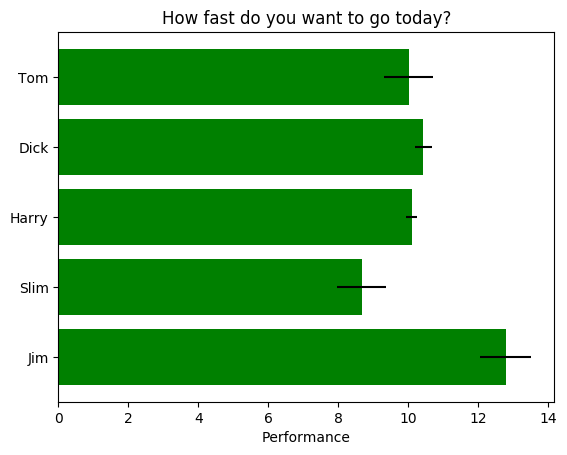

In [34]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

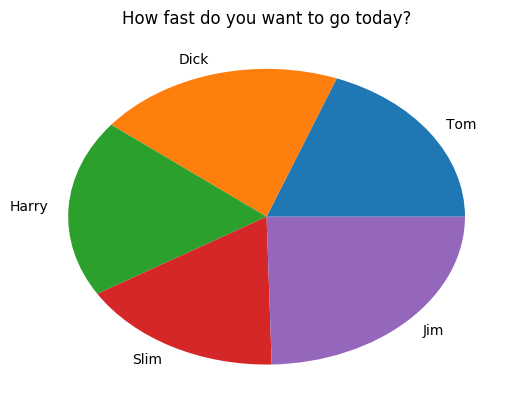

In [35]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


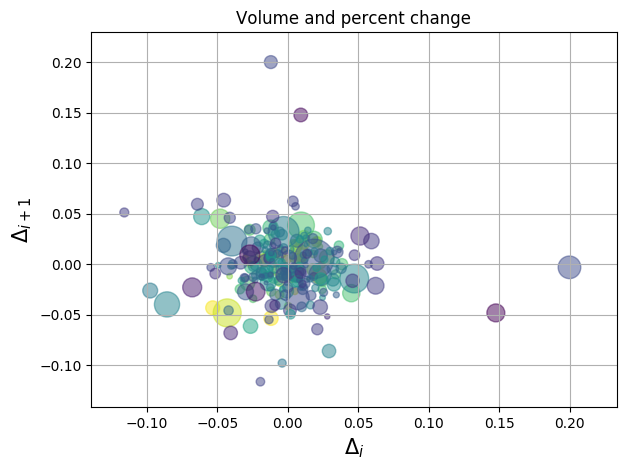

In [36]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

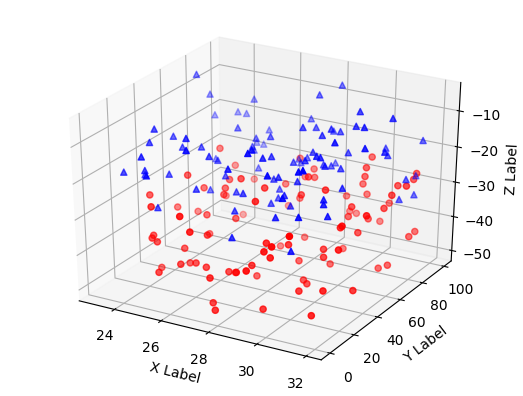

In [37]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Assignment
Draw at least 3 plots from yesterday's data

In [1]:
!apt install ffmpeg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig i965-va-driver libaacs0 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2 libbs2b0
  libcaca0 libcairo2 libcdio-cdda2 libcdio-paranoia2 libcdio17 libchromaprint1
  libcroco3 libcrystalhd3 libdatrie1 libdc1394-22 libdrm-amdgpu1 libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libfftw3-double3 libflac8 libflite1
  libfribidi0 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common
  libgl1 libgl1-mesa-dri libglx-mesa0 libglx0 libgme0 libgsm1 libiec61883-0
  libjack-jackd2-0 libjbig0 libllvm6.0 libmp3lame0 libmpg123-0 libmysofa0
  libnuma1 libogg0 libopenal-data libopenal1 libopenjp2-7 libopenmpt0 libopus0
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpciaccess0
  libpixman-1-0 libpostproc54 libpu

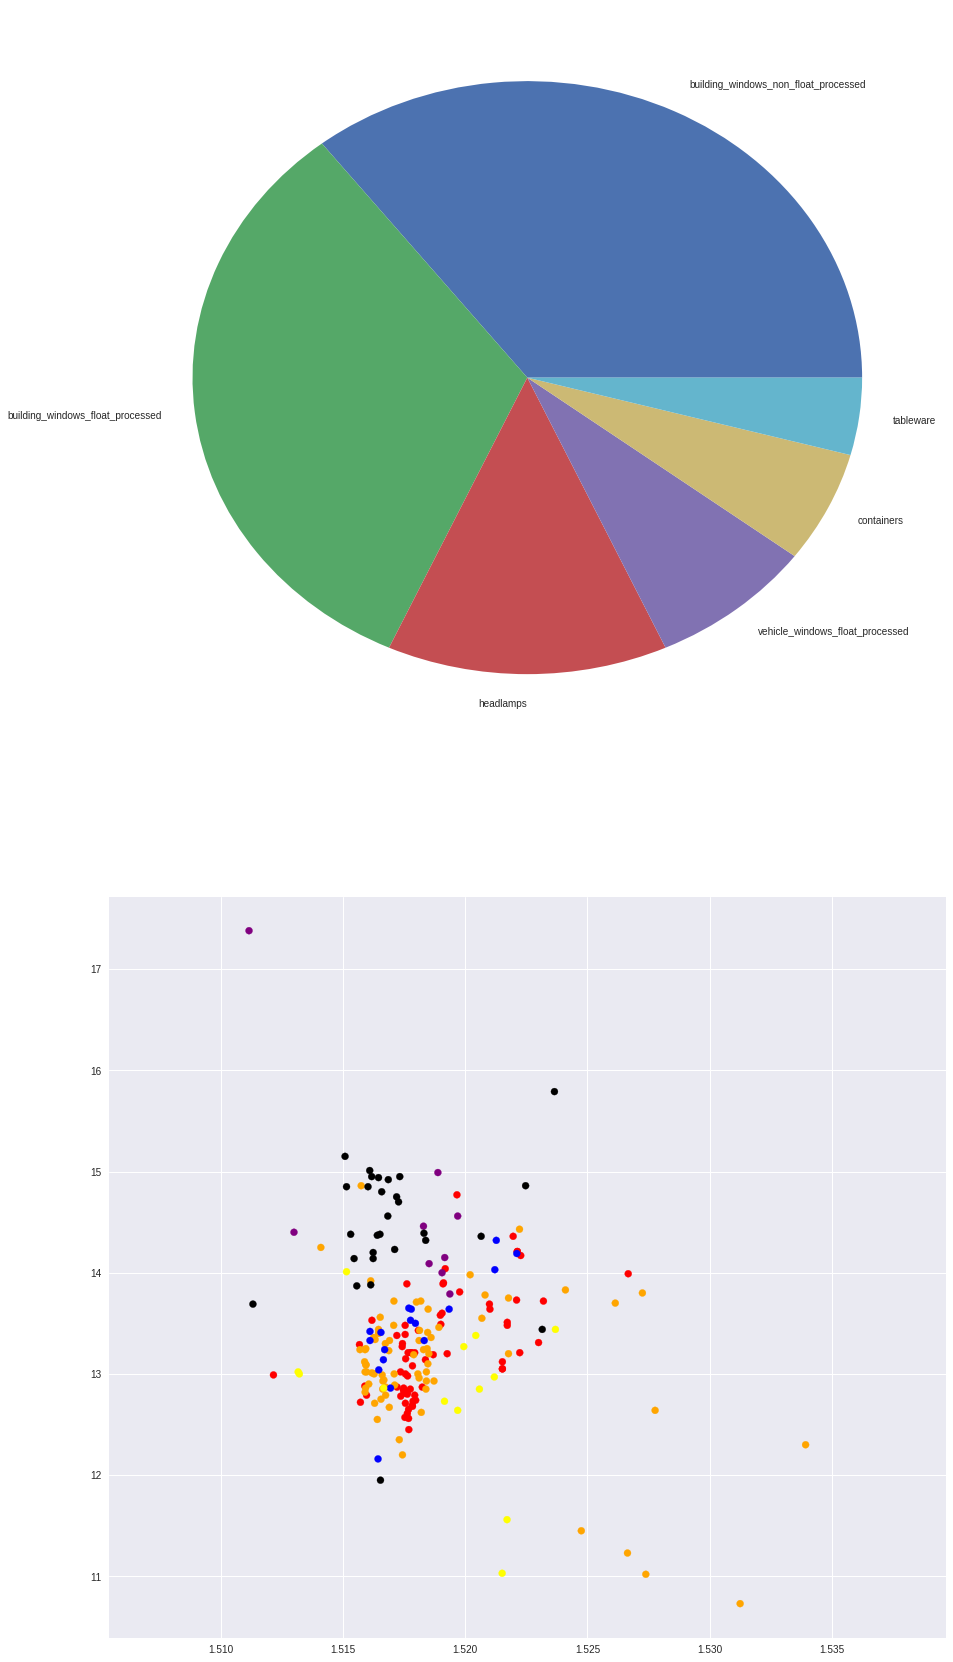

In [2]:
glass_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glass_data = pd.read_csv(glass_url, header=None, names=['Id Number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'])

# Mapping category to representative integer
glass_type = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}
glass_data['Type of glass'] = glass_data['Type of glass'].map(glass_type)

color_map = {
    'building_windows_float_processed': 'red',
    'building_windows_non_float_processed': 'orange',
    'vehicle_windows_float_processed': 'blue',
    'vehicle_windows_non_float_processed': 'green',
    'containers': 'yellow',
    'tableware': 'purple',
    'headlamps': 'black'
}
colors = [color_map[x] for x in glass_data['Type of glass']]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,30))

pie_labels = []
pie_values = []
glass_type_valcts = glass_data['Type of glass'].value_counts()
for a in glass_type_valcts.keys():
  pie_values.append(glass_type_valcts[a])
  pie_labels.append(a)
ax1.pie(pie_values, labels=pie_labels)
ax2.scatter(glass_data["RI"], glass_data["Na"], c=colors)
plt.show()

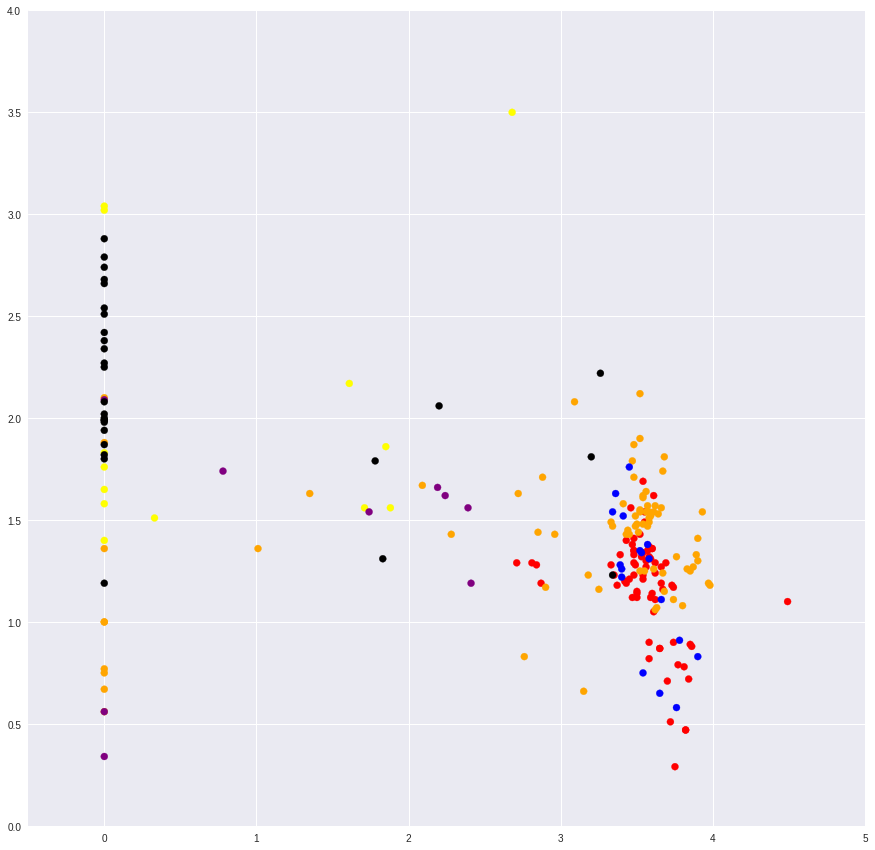

In [8]:
xdata = []
ydata = []
cols = []

def init():
  ax.set_xlim(-0.5, 5.0)
  ax.set_ylim(0.0, 4.0)
  return ln,

def animate(n):
  xdata.append(glass_data['Mg'][n])
  ydata.append(glass_data['Al'][n])
  cols.append(colors[n])
  ln.set_offsets(np.c_[xdata,ydata])
  ln.set_color(cols)
  return ln,

fig, ax = plt.subplots(figsize=(15,15))
ln = plt.scatter(xdata, ydata, animated=True)
ani = animation.FuncAnimation(fig, animate, frames=range(glass_data.shape[0]), init_func=init, repeat=True, blit=True)
ani_html = HTML(ani.to_html5_video())

ani_html